In [1]:
import os
import glob
import json
import pandas as pd
import numpy as np
import requests
import re

os.environ['BEEP_ENV'] = 'dev'

New battery_archive data

Structuring from time series a

In [2]:
d_dir = "./TRI-Capstone/NewData/DeltaQFastCharge/"
t_dir = "./TRI-Capstone/NewData/TrajectoryFastCharge/"

In [3]:
path = "E:/Data/TRI/NewData/"
d_dir = path + "DeltaQFastCharge/"
t_dir = path + "TrajectoryFastCharge/"

In [4]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if ".json" in fullPath:
            allFiles.append(fullPath)
    return allFiles

In [5]:
d_list = getListOfFiles(d_dir)
print(len(d_list))
d_list

30


['E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH00_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH01_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH02_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH03_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH04_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH05_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH06_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH07_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH08_features_DeltaQFastCharge.json',
 'E:/Data/TRI/NewData/DeltaQFastCharge/LFP_15C_0-100_0.5-1C_a_CH09_features_DeltaQFastCharge.json',


In [6]:
new_names = []
for file in d_list:
    new_names.append(re.findall("CH(.*?)\_f", file)[0])

In [7]:
d_df = pd.DataFrame()
for file in d_list:
    with open(file) as data_file:    
        data = json.load(data_file)
        data_df = pd.json_normalize(data)
        d_df = pd.concat([d_df,data_df])
d_df.reset_index(drop=True,inplace=True)
d_df['bat_num'] = new_names
d_df.head()

,@module,@class,name,@version,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,X.abs_min_discharge_capacity_difference_cycles_2:100,...,X.internal_resistance_difference_cycles_2:100,X.nominal_capacity_by_median,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.init_pred_cycle,metadata.parameters.mid_pred_cycle,metadata.parameters.final_pred_cycle,metadata.parameters.n_nominal_cycles,bat_num
0,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.03],[1.035],[1.032],[306697.58829142264],[5760.0],[-0.44680629485828904],...,[nan],[1.033],None,None,None,10,91,100,40,00
1,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.04],[1.0430000000000001],[1.042],[296427.4028991698],[5785.60009765625],[-0.20877572651236104],...,[nan],[1.044],None,None,None,10,91,100,40,01
2,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.03],[1.0290000000000001],[1.03],[262556.75055948895],[5811.2001953125],[-0.19563143967312835],...,[nan],[1.031],None,None,None,10,91,100,40,02
3,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.029],[1.0260000000000002],[1.025],[268508.7274637858],[5785.60009765625],[-0.6317302807027921],...,[nan],[1.028],None,None,None,10,91,100,40,03
4,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[1.067],[1.074],[1.0590000000000002],[614925.4964558918],[5785.60009765625],[-0.1893985483034041],...,[nan],[1.067],None,None,None,10,91,100,40,04


In [8]:
t_list = getListOfFiles(t_dir)
print(len(t_list))
t_list

30


['E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH00_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH01_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH02_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH03_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH04_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH05_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH06_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH07_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/TrajectoryFastCharge/LFP_15C_0-100_0.5-1C_a_CH08_features_TrajectoryFastCharge.json',
 'E:/Data/TRI/NewData/Trajec

In [9]:
t_df = pd.DataFrame()
for file in t_list:
    with open(file) as data_file:    
        data = json.load(data_file)
        data_df = pd.json_normalize(data)
        t_df = pd.concat([t_df,data_df])
t_df.reset_index(inplace=True)
t_df.head()

,index,@module,@class,name,@version,X.capacity_0.98,X.capacity_0.95,X.capacity_0.92,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,0,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[506.0],[506.0],[506.0],[4550.0],[4550.0],[4550.0],[4550.0],None,None,None,0.98,0.78,0.03
1,0,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[506.0],[506.0],[3552.0],[3552.0],[3552.0],[3552.0],[3552.0],None,None,None,0.98,0.78,0.03
2,0,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[506.0],[506.0],[506.0],[3760.0],[3760.0],[3760.0],[3760.0],None,None,None,0.98,0.78,0.03
3,0,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[506.0],[506.0],[506.0],[3753.0],[3753.0],[3753.0],[3753.0],None,None,None,0.98,0.78,0.03
4,0,beep.featurize,TrajectoryFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,[207.0],[207.0],[207.0],[3049.0],[3049.0],[3049.0],[3049.0],None,None,None,0.98,0.78,0.03


In [10]:
df_full = d_df.merge(t_df, left_index=True, right_index=True)

# Making values not stored as lists
for column in df_full.columns:
    if "X." in column:
        df_full[column] = df_full[column].apply(lambda x: x[0])

df_full.reset_index(inplace=True)
df_full

,level_0,@module_x,@class_x,name_x,@version_x,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,...,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode_y,metadata.protocol_y,metadata.channel_id_y,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,0,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.030,1.035,1.032,306697.588291,5760.000000,...,4550.0,4550.0,4550.0,4550.0,None,None,None,0.98,0.78,0.03
1,1,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.040,1.043,1.042,296427.402899,5785.600098,...,3552.0,3552.0,3552.0,3552.0,None,None,None,0.98,0.78,0.03
2,2,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.030,1.029,1.030,262556.750559,5811.200195,...,3760.0,3760.0,3760.0,3760.0,None,None,None,0.98,0.78,0.03
3,3,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.029,1.026,1.025,268508.727464,5785.600098,...,3753.0,3753.0,3753.0,3753.0,None,None,None,0.98,0.78,0.03
4,4,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.067,1.074,1.059,614925.496456,5785.600098,...,3049.0,3049.0,3049.0,3049.0,None,None,None,0.98,0.78,0.03
5,5,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.032,1.032,1.029,460906.194088,5785.600098,...,3544.0,3544.0,3544.0,3544.0,None,None,None,0.98,0.78,0.03
6,6,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.035,1.038,1.035,460296.723763,5785.600098,...,3547.0,3547.0,3547.0,3547.0,None,None,None,0.98,0.78,0.03
7,7,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.050,1.048,1.048,457406.060653,5785.600098,...,3037.0,3037.0,3037.0,3037.0,None,None,None,0.98,0.78,0.03
8,8,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.049,1.048,1.047,467247.932532,5785.600098,...,3037.0,3037.0,3037.0,3037.0,None,None,None,0.98,0.78,0.03
9,9,beep.featurize,DeltaQFastCharge,C:\Users\mattm\Documents\CalPoly\DATA 451\Toyo...,2021.1.11.15,1.036,1.027,1.030,394481.761096,5811.200195,...,3543.0,3543.0,3543.0,3543.0,None,None,None,0.98,0.78,0.03


In [11]:
print(min(df_full['X.capacity_0.8']))
print(max(df_full['X.capacity_0.8']))

207.0
19174.0


Model Receration

In [12]:
variance_model_features = 'X.abs_variance_discharge_capacity_difference_cycles_2:100'
discharge_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                            'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                            'X.abs_skew_discharge_capacity_difference_cycles_2:100',
                            'X.abs_kurtosis_discharge_capacity_difference_cycles_2:100',
                            'X.discharge_capacity_cycle_2',
                            'X.max_discharge_capacity_difference'
                            ]
full_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                       'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                       'X.slope_discharge_capacity_cycle_number_2:100',
                       'X.intercept_discharge_capacity_cycle_number_2:100',
                       'X.discharge_capacity_cycle_2',
                       'X.charge_time_cycles_1:5',
                       'X.integrated_time_temperature_cycles_1:100']
#                        'X.min_internal_resistance_cycles_2:100',
#                        'X.internal_resistance_difference_cycles_2:100']
y = 'X.capacity_0.8'

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import KFold
from sklearn.utils import resample
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='X.abs_variance_discharge_capacity_difference_cycles_2:100', ylabel='X.capacity_0.8'>

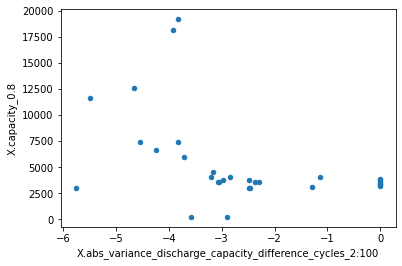

In [14]:
df_full.plot.scatter(x='X.abs_variance_discharge_capacity_difference_cycles_2:100', y = 'X.capacity_0.8')

In [15]:
# KFold 
splits = []
kf = KFold(n_splits=2,shuffle=True, random_state = 4)
for train_index, test_index in kf.split(df_full):
    splits.append((train_index,test_index))
    print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 1  2  4  5  7  8  9 13 14 18 22 23 24 26 27] TEST: [ 0  3  6 10 11 12 15 16 17 19 20 21 25 28 29]
TRAIN: [ 0  3  6 10 11 12 15 16 17 19 20 21 25 28 29] TEST: [ 1  2  4  5  7  8  9 13 14 18 22 23 24 26 27]


In [16]:
splits

[(array([ 1,  2,  4,  5,  7,  8,  9, 13, 14, 18, 22, 23, 24, 26, 27]),
  array([ 0,  3,  6, 10, 11, 12, 15, 16, 17, 19, 20, 21, 25, 28, 29])),
 (array([ 0,  3,  6, 10, 11, 12, 15, 16, 17, 19, 20, 21, 25, 28, 29]),
  array([ 1,  2,  4,  5,  7,  8,  9, 13, 14, 18, 22, 23, 24, 26, 27]))]

In [17]:
train_ind = splits[0][0]
test_ind = splits[0][1]

In [18]:
# Variance model
X_train_var = df_full.iloc[train_ind][[variance_model_features]]
y_train = df_full.iloc[train_ind][[y]]

X_test_var = df_full.iloc[test_ind][[variance_model_features]]
y_test = df_full.iloc[test_ind][[y]]

reg_var = LinearRegression().fit(X_train_var,y_train)
y_pred_train_var = reg_var.predict(X_train_var)
y_pred_test_var = reg_var.predict(X_test_var)

rmse_train_var = np.sqrt(mean_squared_error(y_train, y_pred_train_var))
rmse_test_var = np.sqrt(mean_squared_error(y_test, y_pred_test_var))
mape_train_var = mean_absolute_percentage_error(y_train, y_pred_train_var)
mape_test_var = mean_absolute_percentage_error(y_test, y_pred_test_var)

print("Variance Model")
print("Training RMSE: ", rmse_train_var)
print("Test RMSE: ", rmse_test_var)
print("Mean % Train Error: ", mape_train_var)
print("Mean % Test Error: ", mape_test_var)

Variance Model
Training RMSE:  2546.458758586743
Test RMSE:  5040.126778483995
Mean % Train Error:  2.1842460993900454
Mean % Test Error:  2.0236245907058086


Text(0.5, 1.0, 'Variance Model Predicted vs. True Values')

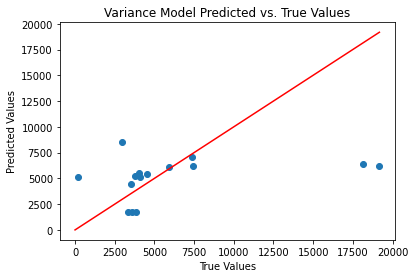

In [19]:
# Variance model
max_var = y_test.max()[0]

plt.scatter(y_test, y_pred_test_var)
plt.plot([0, max_var], [0, max_var], color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Variance Model Predicted vs. True Values")

In [20]:
# discharge model
X_train_dis = df_full.iloc[train_ind][discharge_model_features]
X_train_dis.dropna(inplace = True)
X_train_dis_index = list(X_train_dis.index.values)

y_train = df_full.iloc[X_train_dis_index][[y]]

X_test_dis = df_full.iloc[test_ind][discharge_model_features]
X_test_dis.dropna(inplace = True)
X_test_dis_index = list(X_test_dis.index.values)

y_test = df_full.iloc[X_test_dis_index][[y]]

reg_dis = LinearRegression().fit(X_train_dis,y_train)
y_pred_train_dis = reg_dis.predict(X_train_dis)
y_pred_test_dis = reg_dis.predict(X_test_dis)

rmse_train_dis = np.sqrt(mean_squared_error(y_train, y_pred_train_dis))
rmse_test_dis = np.sqrt(mean_squared_error(y_test, y_pred_test_dis))
mape_train_dis = mean_absolute_percentage_error(y_train, y_pred_train_dis)
mape_test_dis = mean_absolute_percentage_error(y_test, y_pred_test_dis)

print("Discharge Model")
print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train_dis)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test_dis)))
print("Mean % Train Error: ", mean_absolute_percentage_error(y_train, y_pred_train_dis))
print("Mean % Test Error: ", mean_absolute_percentage_error(y_test, y_pred_test_dis))

Discharge Model
Training RMSE:  211.5286488754278
Test RMSE:  2107.9781060633404
Mean % Train Error:  0.103467541211743
Mean % Test Error:  1.1476593619368323


Text(0.5, 1.0, 'Discharge Model Predicted vs. True Values')

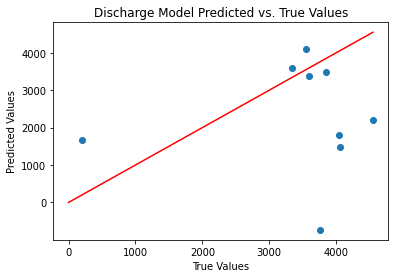

In [21]:
# Discharge model
max_dis = y_test.max()[0]

plt.scatter(y_test, y_pred_test_dis)
plt.plot([0, max_dis], [0, max_dis], color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Discharge Model Predicted vs. True Values")

In [22]:
# full model
X_train_full = df_full.iloc[train_ind][full_model_features]
X_train_full.replace(-np.Inf, np.nan, inplace = True)
X_train_full.dropna(inplace = True)
X_train_full_index = list(X_train_full.index.values)

y_train = df_full.iloc[X_train_full_index][[y]]

X_test_full = df_full.iloc[test_ind][full_model_features]
X_test_full.replace(-np.Inf, np.nan, inplace = True)
X_test_full.dropna(inplace = True)
X_test_full_index = list(X_test_full.index.values)

y_test = df_full.iloc[X_test_full_index][[y]]

reg_full = LinearRegression().fit(X_train_full,y_train)
y_pred_train_full = reg_full.predict(X_train_full)
y_pred_test_full = reg_full.predict(X_test_full)

rmse_train_full = np.sqrt(mean_squared_error(y_train, y_pred_train_full))
rmse_test_full = np.sqrt(mean_squared_error(y_test, y_pred_test_full))
mape_train_full = mean_absolute_percentage_error(y_train, y_pred_train_full)
mape_test_full = mean_absolute_percentage_error(y_test, y_pred_test_full)

print("Full Model")
print("Training RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train_full)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_test_full)))
print("Mean % Train Error: ", mean_absolute_percentage_error(y_train, y_pred_train_full))
print("Mean % Test Error: ", mean_absolute_percentage_error(y_test, y_pred_test_full))

Full Model
Training RMSE:  285.8219579950519
Test RMSE:  1396.1783567348714
Mean % Train Error:  0.2201231462488074
Mean % Test Error:  0.88072177557931


Text(0.5, 1.0, 'Full Model Predicted vs. True Values')

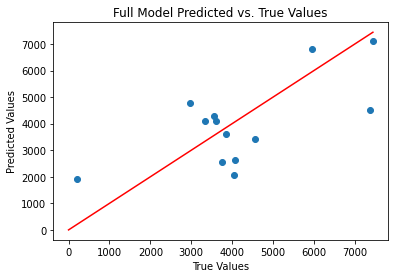

In [23]:
# full model
max_full = y_test.max()[0]

plt.scatter(y_test, y_pred_test_full)
plt.plot([0, max_full], [0, max_full], color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Full Model Predicted vs. True Values")

Text(0.5, 1.0, 'Frequency of X.capacity_0.8')

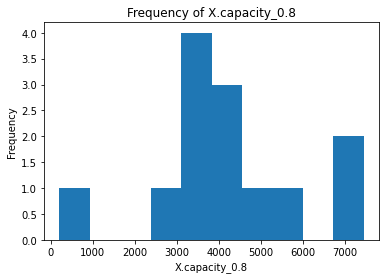

In [24]:
plt.hist(y_test)
plt.xlabel('X.capacity_0.8')
plt.ylabel('Frequency')
plt.title('Frequency of X.capacity_0.8')

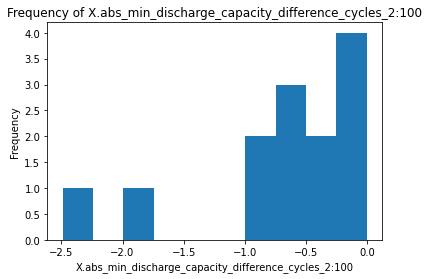

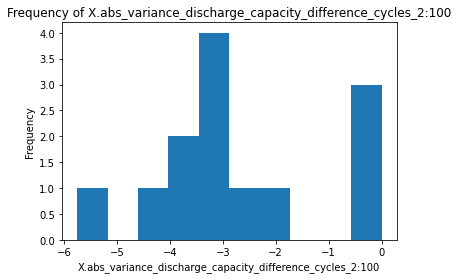

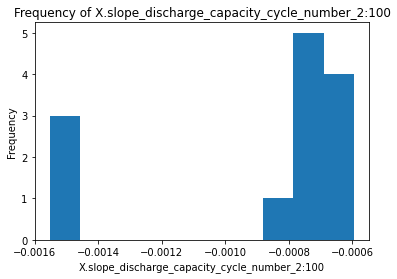

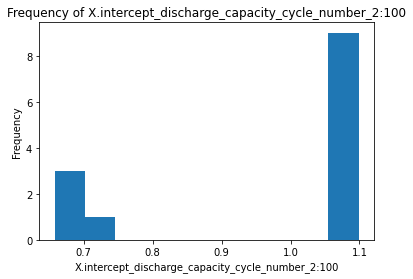

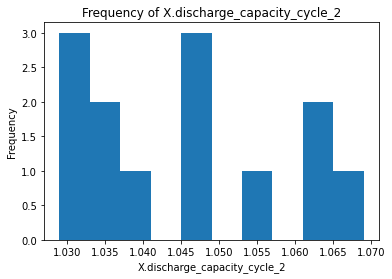

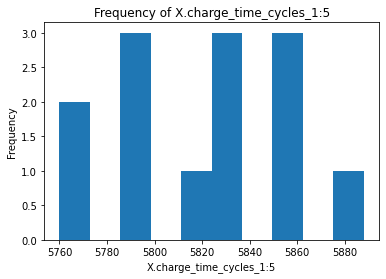

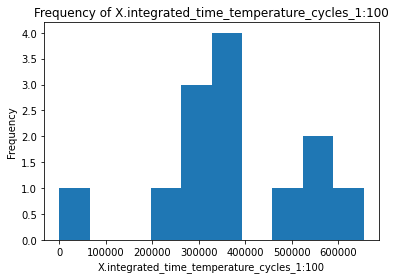

In [25]:
# All columns in X_test_full
for feature in X_test_full.columns:
    plt.hist(X_test_full[feature])
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title("Frequency of " + feature)
    plt.show()

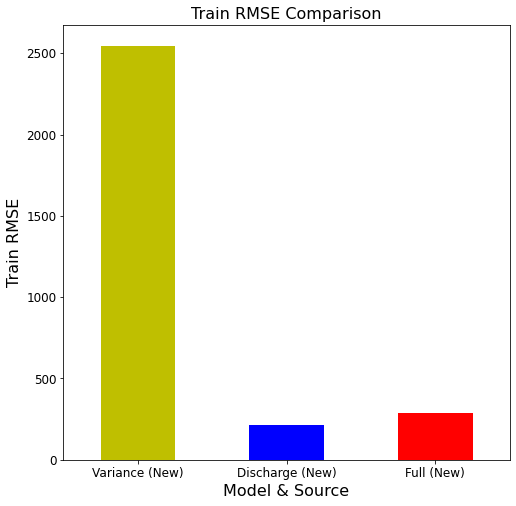

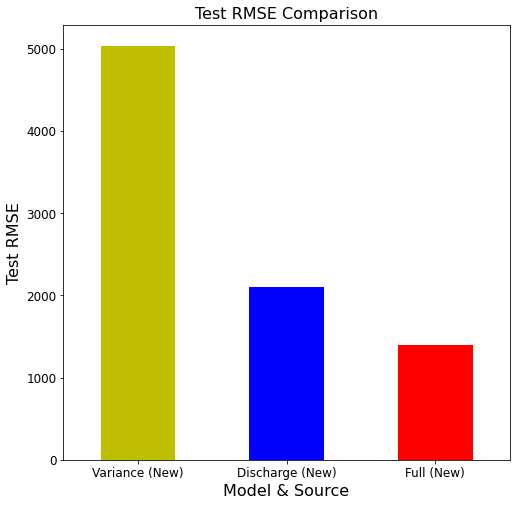

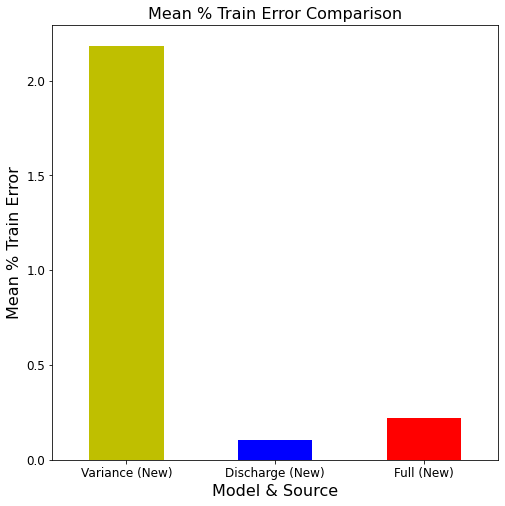

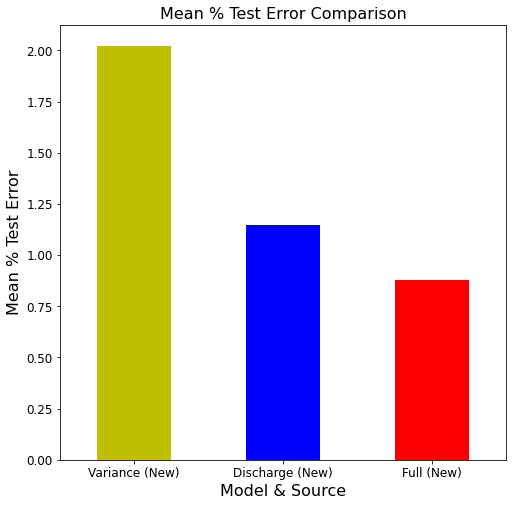

In [26]:
metrics = pd.DataFrame(data = {"Model & Source": ["Variance (New)","Discharge (New)", "Full (New)"],
                               "Train RMSE": [rmse_train_var, rmse_train_dis, rmse_train_full],
                               "Test RMSE": [rmse_test_var, rmse_test_dis, rmse_test_full],
                               "Mean % Train Error": [mape_train_var, mape_train_dis, mape_train_full],
                               "Mean % Test Error": [mape_test_var, mape_test_dis, mape_test_full]})


for column in metrics.columns[1:]:
    ax = metrics.plot.bar(x='Model & Source', y=column, rot=0,
                         fontsize = 12, legend=False, figsize = (8,8),
                         color = ["y","b","r"])

    ax.set_xlabel("Model & Source", fontsize = 16)
    ax.set_ylabel(column, fontsize=16)
    ax.set_title(column + " Comparison", fontsize=16)
    plt.show()
